# Lab 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn
### Шевченко Юлія, ФІ-31мн

### Lab Task:

1. Завантажити дані, вивести назви колонок і розмір датасета
2. Опрацювати пропуски (по можливості заповнити їх або видалити)
3. Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гітсограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)
4. Нормалізувати дані
5. Провести навчання наступних класифікаторів:
    - KNN
    - дерево ухвалення рішень
    - SVM
    - Random Forest
    - AdaBoost
6. Підібрати оптимальні параметри:
    - для KNN
    - для SVM за допомогою GridSearch підібрати оптимальні $C$ і $\gamma$
7. Серед обраних оптимальних моделей кожного класу вибрати найкращу
8. Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

In [1]:
# All the imports for the task
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

For Lab 1 '[19,000 Spotify Songs](https://www.kaggle.com/datasets/edalrami/19000-spotify-songs/data)' dataset was chosen. This dataset contains 19,000 songs from Spotify and has features for every song. Here are some feature explanation:
1. **song_name**: Name of the song.
2. **song_popularity**: Song ratings of Spotify audience.
3. **song_duration_ms**: The duration of the track in milliseconds.
4. **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
5. **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
6. **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
7. **instrumentalness**:  Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
8. **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
9. **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
10. **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
11. **audio_mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
12. **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
13. **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
14. **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
15. **audio_valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Loading dataset

In [2]:
# Loading dataset from csv
spotify_data = pd.read_csv('../Lab_1/song_data.csv')

In [3]:
# Showing the dataset
spotify_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
# Showing the dataset columns
print('The dataset contains such columns: {}'.format(spotify_data.columns))

The dataset contains such columns: Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


In [5]:
# Showing the dataset shape
print('The dataset shape is: {}'.format(spotify_data.shape))

The dataset shape is: (18835, 15)


### Analysis

In [6]:
# Checking if there are some null items in dataset
print('Dataset null summarization:')
spotify_data.isnull().sum()

Dataset null summarization:


song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
# Checking info about data in columns
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
# Some columns have 'int64' type, so we convert them to float
spotify_data.song_duration_ms = spotify_data.song_duration_ms.astype(float)
spotify_data.audio_mode = spotify_data.audio_mode.astype(float)
spotify_data.time_signature = spotify_data.time_signature.astype(float)

In [9]:
# Seeing the data description
spotify_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [10]:
# Considering song is popular if song_popularity value is >= 70
spotify_data['popularity'] = [1 if value >= 70 else 0 for value in spotify_data.song_popularity]
spotify_data.popularity.value_counts()

popularity
0    14384
1     4451
Name: count, dtype: int64

In [11]:
# Seeing popular songs description
popular_songs = spotify_data[spotify_data['popularity'] == 1]
popular_songs.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,4451.000000,4451.000000,4451.000000,4451.000000,4451.00000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.0
mean,78.996630,218759.741182,0.205759,0.666539,0.66148,0.017081,5.146709,0.173100,-6.447939,0.611548,0.107827,120.804441,3.975062,0.519917,1.0
std,7.590576,47607.918329,0.237503,0.146182,0.18032,0.096281,3.681695,0.135505,2.869713,0.487453,0.101882,27.385798,0.247337,0.228177,0.0
min,70.000000,95316.000000,0.000018,0.072200,0.00289,0.000000,0.000000,0.021500,-31.994000,0.000000,0.022800,60.048000,1.000000,0.035200,1.0
25%,73.000000,190295.000000,0.027900,0.571500,0.54500,0.000000,1.000000,0.091500,-7.648000,0.000000,0.039400,98.970000,4.000000,0.336500,1.0
50%,77.000000,212500.000000,0.106000,0.676000,0.68000,0.000000,5.000000,0.120000,-5.892000,1.000000,0.060200,119.886000,4.000000,0.510000,1.0
75%,84.000000,240687.500000,0.294500,0.768000,0.80050,0.000077,8.000000,0.203000,-4.590000,1.000000,0.136000,139.910000,4.000000,0.692000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.99600,0.968000,11.000000,0.978000,-0.739000,1.000000,0.733000,205.999000,5.000000,0.980000,1.0


In [12]:
# Choosing numeric data and describing correlation
spotify_data_numeric = spotify_data.select_dtypes(include = ['float64', 'int64'])
data_correlation = spotify_data_numeric.corr()
data_correlation

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.660385
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.005092
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.101694
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.117811
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.042833
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.152954
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.021929
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.025308
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.145254
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.019096


<Axes: >

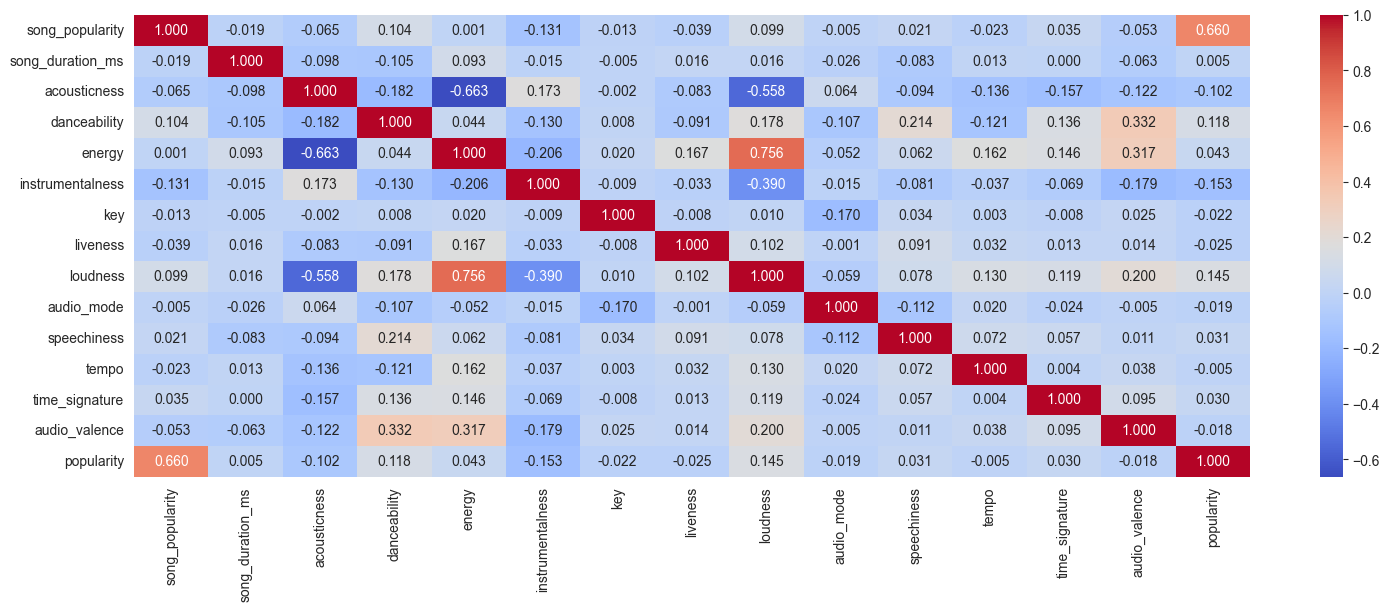

In [13]:
# Creating correlation heatmap
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(data_correlation, cmap='coolwarm', annot=True, fmt='.3f')

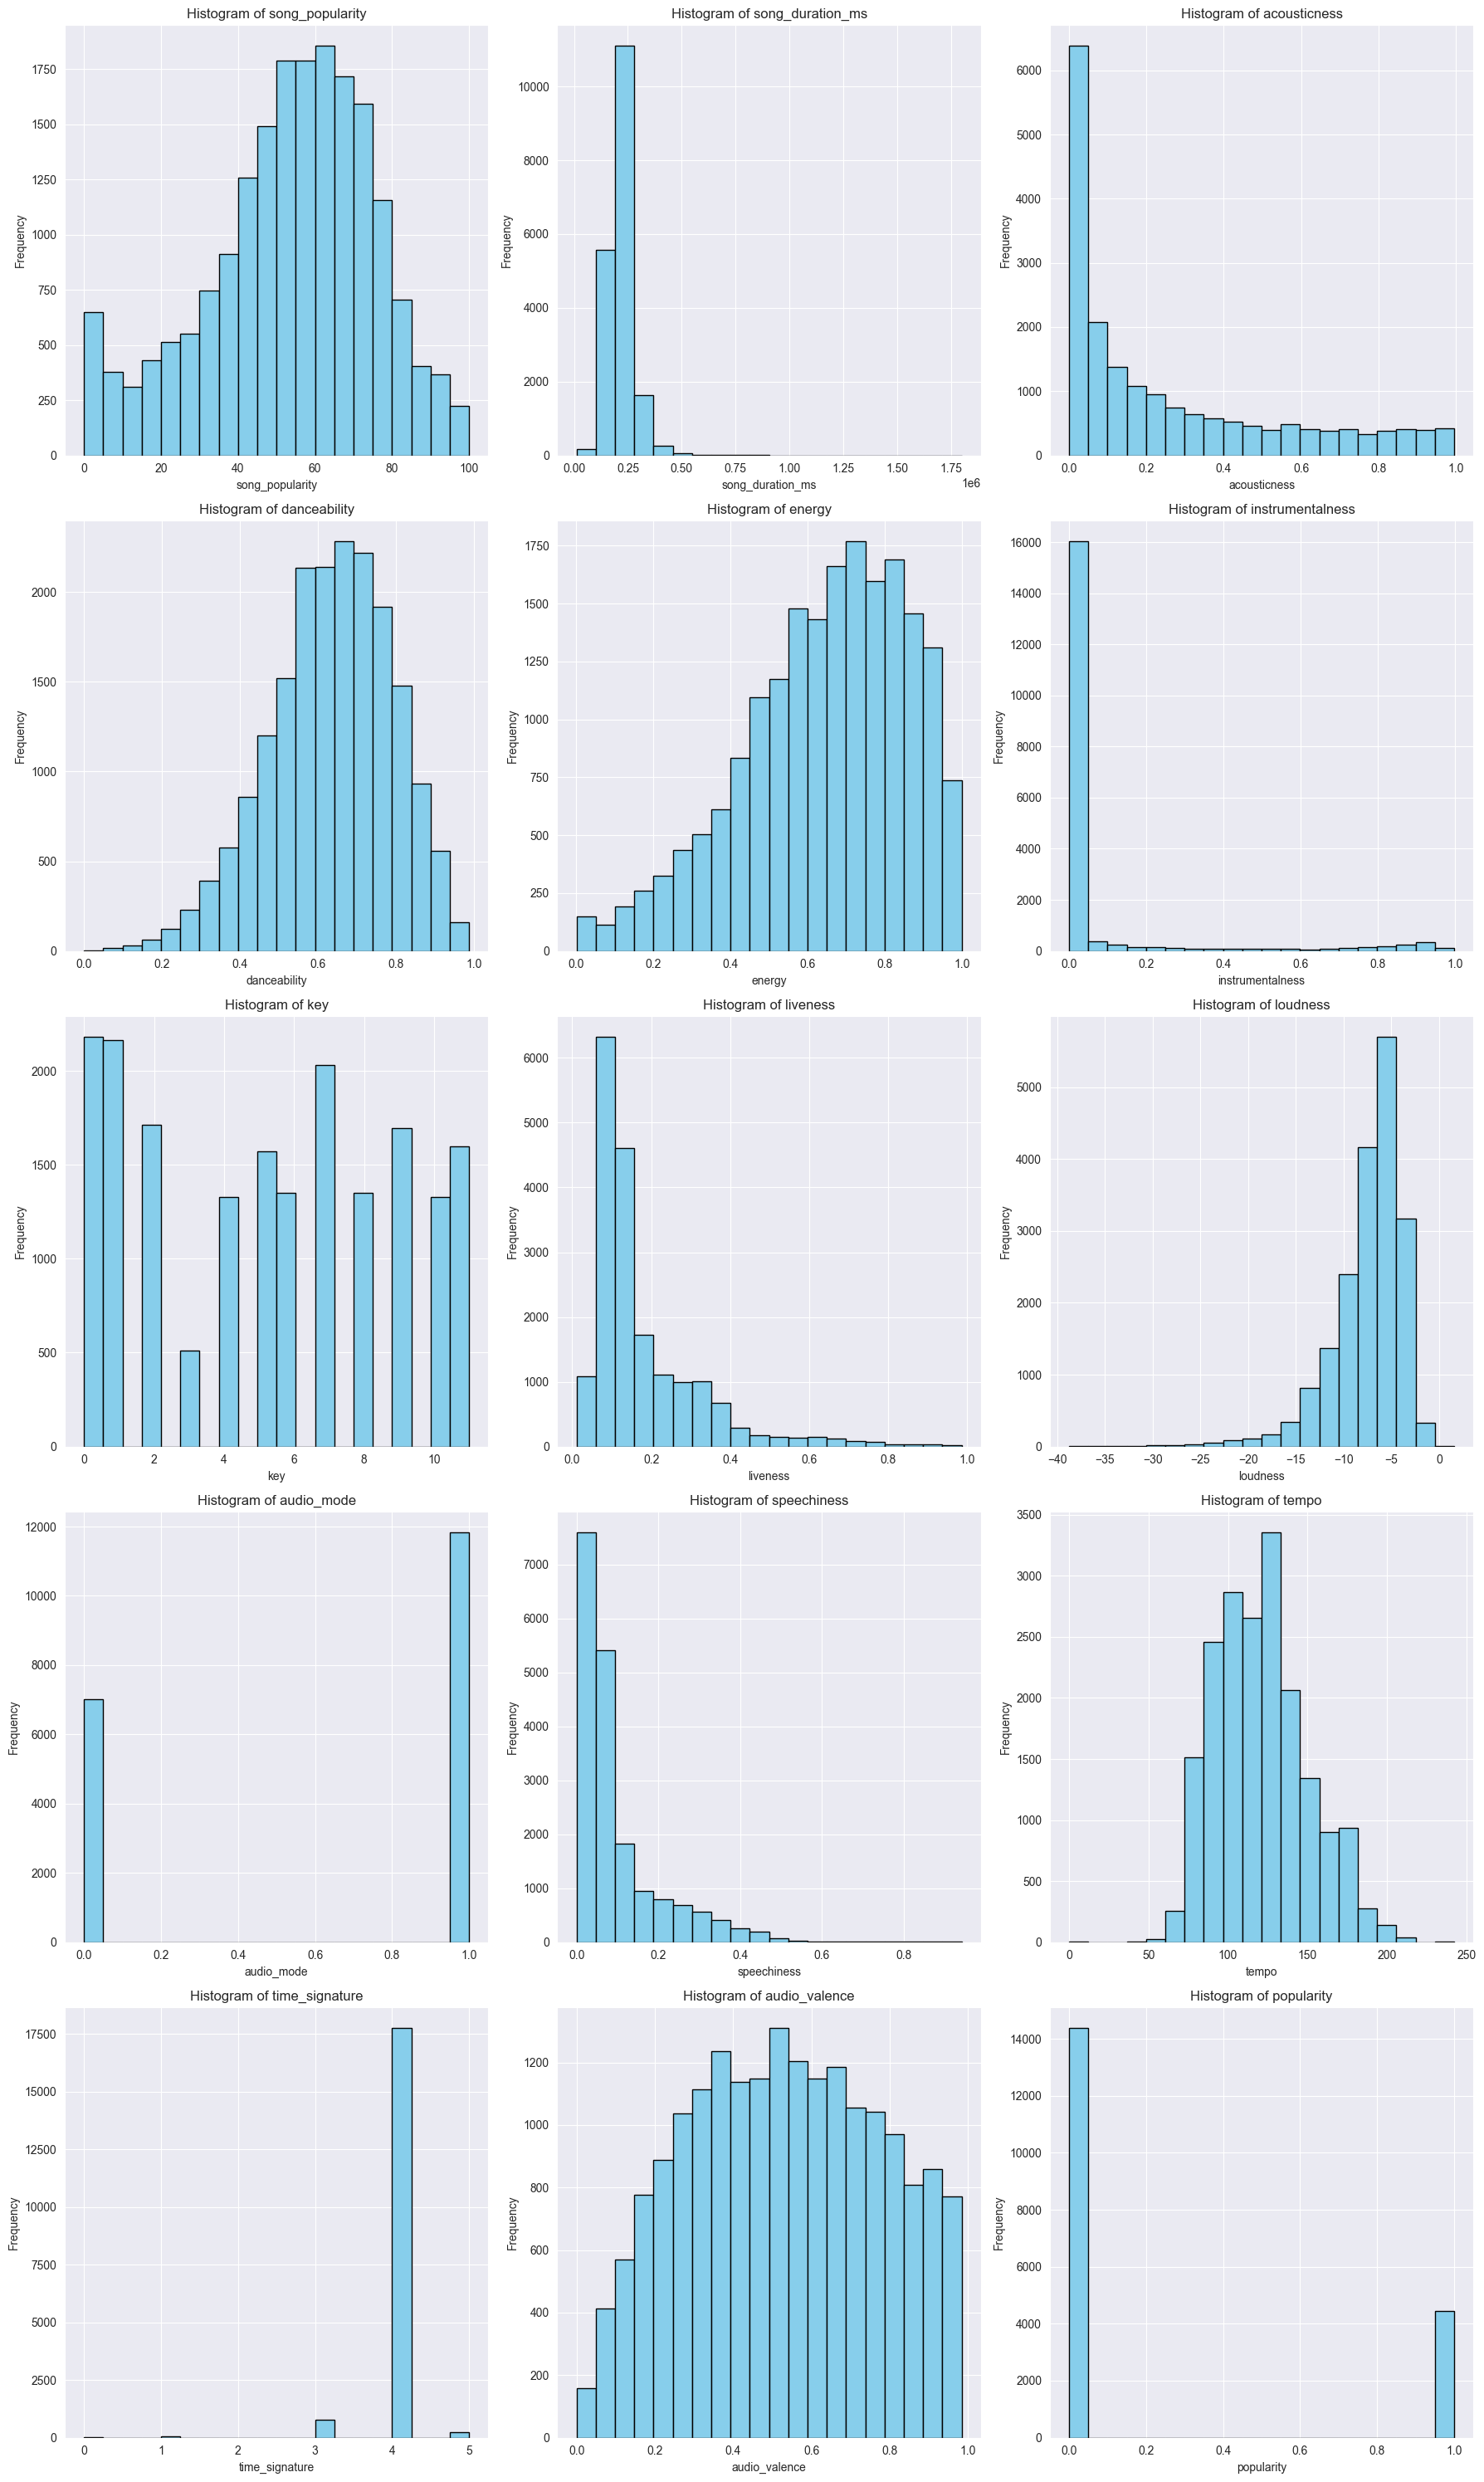

In [14]:
# Building distribution histograms for every column
plt.figure(figsize=(18, 30)) 

for i, column in enumerate(spotify_data_numeric.columns):
    plt.subplot(5, 3, i + 1)
    plt.hist(spotify_data_numeric[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

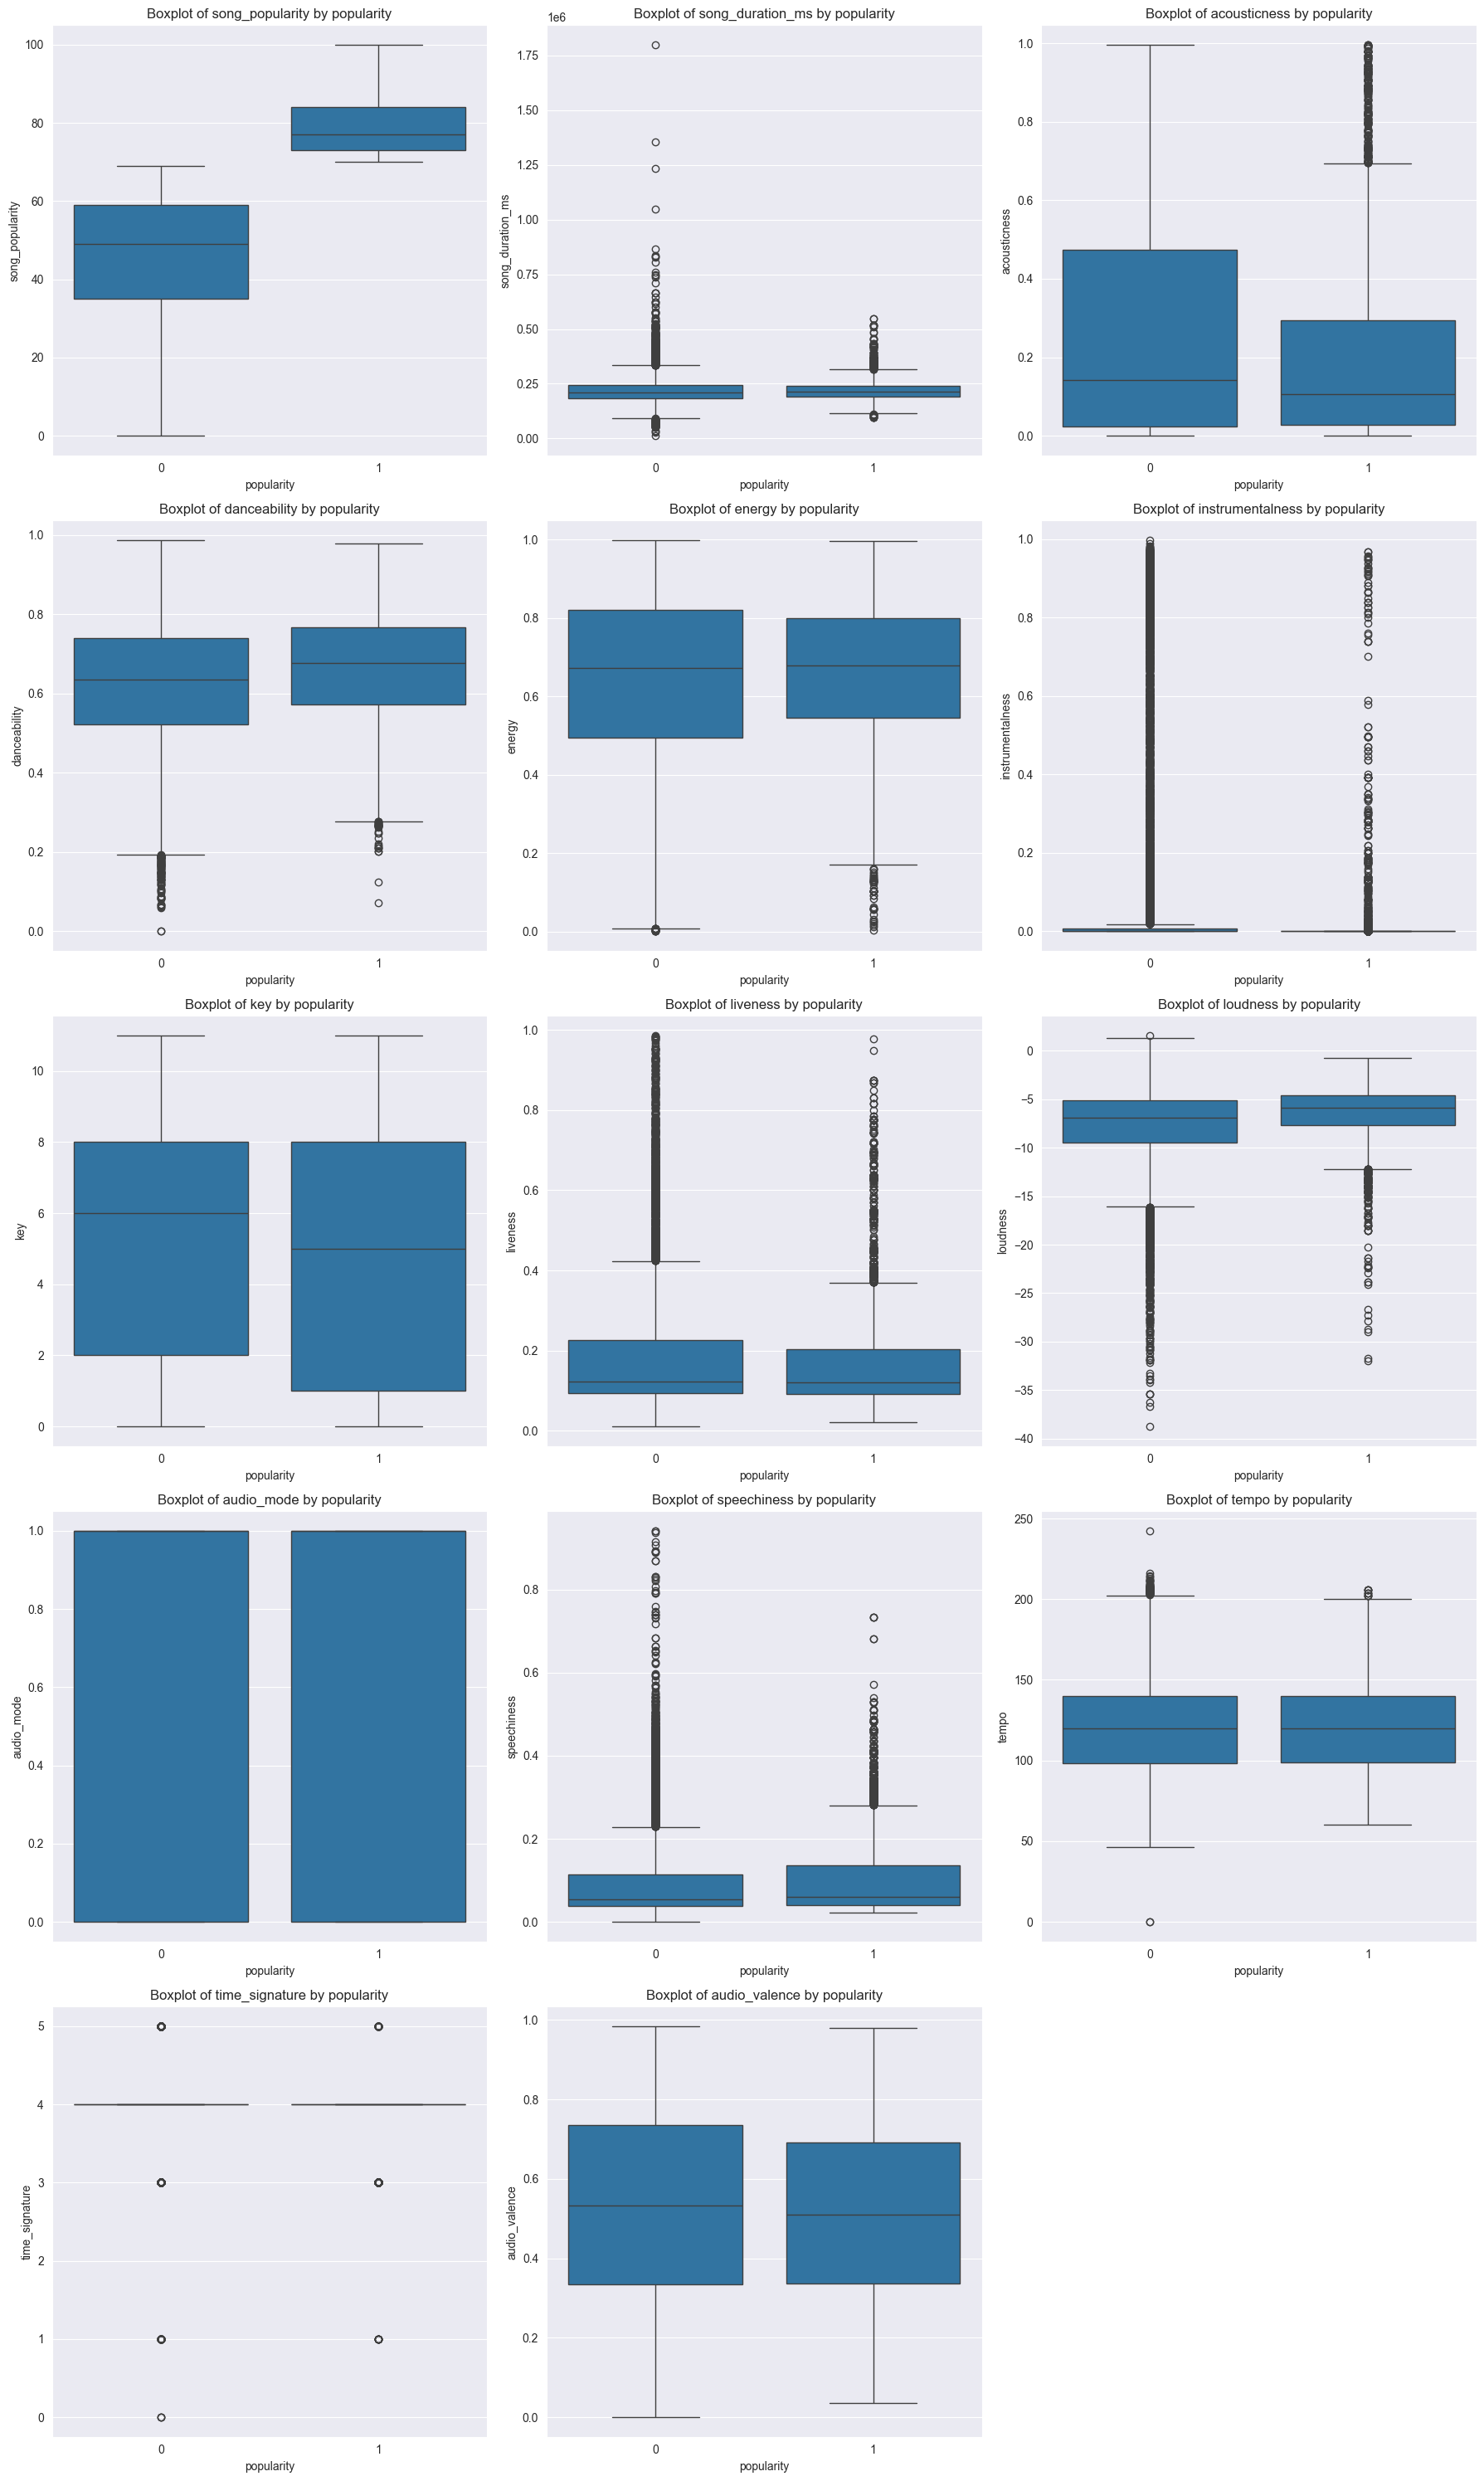

In [15]:
# Building boxplots for every column
goal_column_name = 'popularity'
columns_for_boxplots = spotify_data_numeric.columns
columns_for_boxplots = columns_for_boxplots.drop(goal_column_name, errors='ignore')
plt.figure(figsize=(18, 30))

for i, column in enumerate(columns_for_boxplots):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=spotify_data_numeric[goal_column_name], y=spotify_data_numeric[column])
    plt.xlabel(goal_column_name)
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} by {goal_column_name}')

plt.tight_layout()
plt.show()

### KNN model

In [16]:
# Splitting data to train and test with 20% test data size
X = spotify_data_numeric.drop(['popularity'], axis=1)
y = spotify_data_numeric['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Standardize the variables
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
# Train KNN model
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# KNN model prediction
KNN_prediction = KNN_model.predict(scaled_X_test)

In [20]:
# Confusion matrix
print(confusion_matrix(y_test, KNN_prediction))

[[2721  139]
 [ 194  713]]


In [21]:
# Classification report
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2860
           1       0.84      0.79      0.81       907

    accuracy                           0.91      3767
   macro avg       0.89      0.87      0.88      3767
weighted avg       0.91      0.91      0.91      3767


In [22]:
# Accuracy score
print(accuracy_score(y_test, KNN_prediction))

0.9116007432970533


In [23]:
# Choose best K value
knn_error_rate = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    pred_k = knn.predict(scaled_X_test)
    knn_error_rate.append(np.mean(pred_k != y_test))

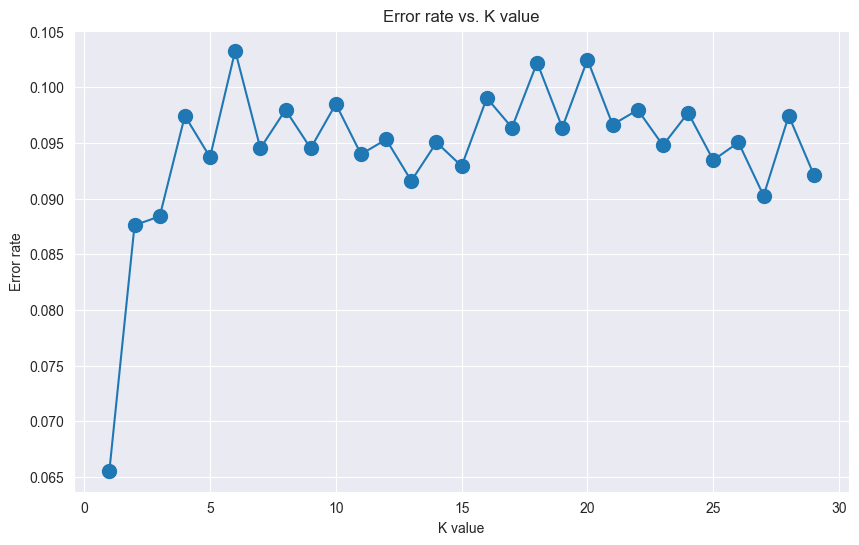

In [24]:
# Building plot of error rate vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), knn_error_rate, marker='o', markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.grid(True)

In [25]:
# KNN model with best K value
best_k_value = min(enumerate(knn_error_rate), key=lambda x: x[1])[0] + 1

KNN_model_optimized = KNeighborsClassifier(n_neighbors=best_k_value)
KNN_model_optimized.fit(scaled_X_train, y_train)

KNN_prediction_optimized = KNN_model_optimized.predict(scaled_X_test)

print('Confusion matrix:')
print(print(confusion_matrix(y_test, KNN_prediction_optimized)))
print()
print('Classification report:')
print(classification_report(y_test, KNN_prediction_optimized))
print()
print('Accuracy score')
print(accuracy_score(y_test, KNN_prediction_optimized))

Confusion matrix:
[[2744  116]
 [ 131  776]]
None

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2860
           1       0.87      0.86      0.86       907

    accuracy                           0.93      3767
   macro avg       0.91      0.91      0.91      3767
weighted avg       0.93      0.93      0.93      3767


Accuracy score
0.934430581364481


### Decision Tree model

In [26]:
# We'll use train and test data from KNN split, so it is commented
# Splitting data to train and test with 20% test data size
# X = spotify_data_numeric.drop(['popularity'], axis=1)
# y = spotify_data_numeric['popularity']
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Train Decision Tree model
Decision_Tree_model = DecisionTreeClassifier(criterion='gini')
Decision_Tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Decision Tree model prediction
Decision_Tree_prediction = Decision_Tree_model.predict(X_test)

In [29]:
# Confusion matrix
print(confusion_matrix(y_test, Decision_Tree_prediction))

[[2860    0]
 [   0  907]]


In [30]:
# Classification report
print(classification_report(y_test, Decision_Tree_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2860
           1       1.00      1.00      1.00       907

    accuracy                           1.00      3767
   macro avg       1.00      1.00      1.00      3767
weighted avg       1.00      1.00      1.00      3767


In [31]:
# Accuracy score
print(accuracy_score(y_test, Decision_Tree_prediction))

1.0


### SVM model